# `trim_disconnected_blobs`
``trim_disconnected_blobs`` is a function which removes blobs that are not connected to specified inlets.  Blobs are any clusters of ``True`` voxels, so this can be used to analyze both solid or void phase by inverting the image as needed.

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import scipy
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()

In [2]:
import inspect
print(inspect.signature(ps.filters.trim_disconnected_blobs))

(im, inlets, strel=None)


##  `im` and `inlets`
The image contains ``True`` values indicating the phase of interest.  `inlets` can be custom created to indicate which blobs to trim.

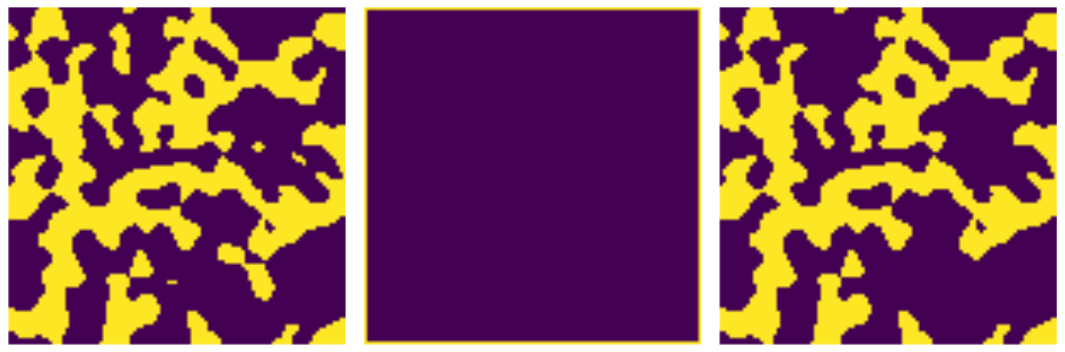

In [3]:
np.random.seed(0)
im = ps.generators.blobs(shape=[100, 100], porosity=0.4)
inlets = ps.tools.get_border(shape=im.shape, mode='faces')
im2 = ps.filters.trim_disconnected_blobs(im, inlets)

fig, ax = plt.subplots(1, 3, figsize=[15, 5])
ax[0].imshow(im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(inlets, origin='lower', interpolation='none')
ax[1].axis(False)
ax[2].imshow(im2, origin='lower', interpolation='none')
ax[2].axis(False);

## `strel`
A structuring element can be provided to indicate how to determine whether clusters of voxels are connected or not.

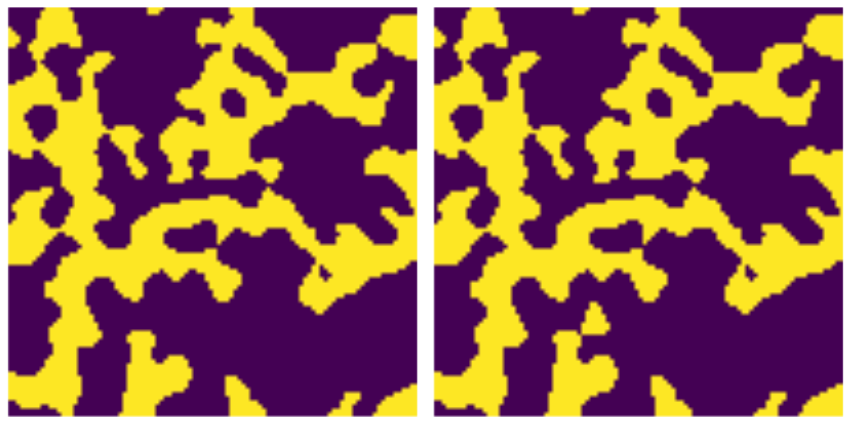

In [4]:
strel = ps.tools.ps_round(r=1, ndim=2, smooth=False)
im1 = ps.filters.trim_disconnected_blobs(im, inlets, strel)
strel = ps.tools.ps_rect(w=3, ndim=2)
im2 = ps.filters.trim_disconnected_blobs(im, inlets, strel)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False);